In [1]:
import pandas as pd
from sklearn import datasets,metrics,tree
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [31]:
x_train, x_test, y_train, y_test = train_test_split(data,data['restecg'], test_size = 0.5, random_state = 0)

In [32]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1


In [33]:
y_train

77     1
279    0
190    1
19     1
257    0
      ..
251    0
192    1
117    0
47     0
172    0
Name: restecg, Length: 151, dtype: int64

[Text(133.92000000000002, 181.2, 'X[6] <= 0.5\nentropy = 1.087\nsamples = 151\nvalue = [71, 78, 2]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 71\nvalue = [71, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[6] <= 1.5\nentropy = 0.169\nsamples = 80\nvalue = [0, 78, 2]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 78\nvalue = [0, 78, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]')]

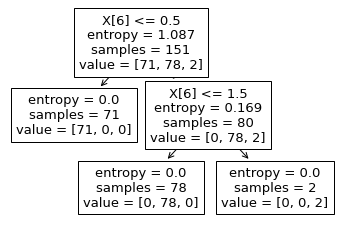

In [34]:
model = tree.DecisionTreeClassifier(criterion="entropy")
model.fit(x_train,y_train)
tree.plot_tree(model)

In [35]:
model.score(x_test,y_test)

1.0

In [36]:
model

DecisionTreeClassifier(criterion='entropy')

In [37]:
expected = y_test
predicted = model.predict(x_test)

In [38]:
metrics.classification_report(expected, predicted)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        76\n           1       1.00      1.00      1.00        74\n           2       1.00      1.00      1.00         2\n\n    accuracy                           1.00       152\n   macro avg       1.00      1.00      1.00       152\nweighted avg       1.00      1.00      1.00       152\n'

In [39]:
metrics.confusion_matrix(expected, predicted)

array([[76,  0,  0],
       [ 0, 74,  0],
       [ 0,  0,  2]], dtype=int64)

In [40]:
metrics.accuracy_score(y_test,predicted)

1.0